# Erythmato Squamous Disease Classification

### **Required basic libraries**

In [1]:
!pip install seaborn
!pip install plotly_express==0.4.0
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### **Exploratory Data Analysis**

In [2]:
derm_df=pd.read_csv("derm.csv")
derm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [3]:
derm_df

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
0                             1                  0  ...   
1                             1                  1  ...   
2                             0                  0  ...   
3                             3                  2  ...   
4                             0                  0  ...   
..                          ...                ...  ...   
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
0                                      0   
1                                      0   
2                                      0   
3                                      3   
4                                      2   
..                                   ...   
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                          0           3   
1                                          0           0   
2                                          2           3   
3                                          0           0   
4                                          3           2   
..                                       ...         ...   
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                                0                     0   
1                                0                     0   
2                                2                     0   
3                                0                     0   
4   

***(i) Data set contains only float and integer type values***

***(ii) Also, some NULL Values are present in 'age' column***

In [4]:
derm_df.describe()

erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  ...  disappearance_of_the_granular_layer  \
count         366.000000  ...                           366.000000   
mean            0.519126  ...                             0.464481   
std             0.905639  ...                             0.864899   
min             0.000000  ...                             0.000000   
25%             0.000000  ...                             0.000000   
50%             0.000000  ...                             0.000000   
75%             1.000000  ...                             1.000000   
max             3.000000  ...                             3.000000   

       vacuolisation_and_damage_of_basal_layer  spongiosis  \
count                               366.000000  366.000000   
mean                                  0.456284    0.953552   
std                                   0.954873    1.130172   
min                                   0.000000    0.000000   
25%                                   0.000000    0.000000   
50%                                   0.000000    0.000000   
75%                                   0.000000    2.000000   
max                                   3.000000    3.000000   

       saw-tooth_appearance_of_retes  follicular_horn_plug  \
count                     366.000000            366.000000   
mean                        0.453552              0.103825   
std                         0.954744              0.450433   
min                         0.000000              0.000000   
25%                         0.000000              0.000000   
50%                         0.000000              0.000000   
75%                         0.000000              0.000000   
max                         3.000000              3.000000   

       perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
count                    366.000000                           366.000000   
mean                       0.114754                             1.866120   
std                        0.488723                             0.726108   
min                        0.000000                             0.000000   
25%                        0.000000                             1.000000   
50%                        0.000000                    

In [5]:
target_col = derm_df['class'].copy()
target_col.unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

* ***Target variable/Dependent variable(class) is discrete and categorical in nature.***
* ***“Class” score scale ranges from 1 to 6; where***

> **1 -> psoriasis**

> **2 -> seboreic dermatitis**

> **3 -> lichen planus**

> **4 -> pityriasis rosea**

> **5 -> cronic dermatitis**

> **6 -> pityriasis rubra pilaris**
***

In [6]:
target_col.value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

* ***This tells us vote count of each "class" score in descending order.***
* ***“class” has most values concentrated under class-1 i.e "psoriasis" disease type.***
* ***Minimum no. of observations for class-6 i.e "pityriasis rubra pilaris"***

In [7]:
derm_df.isna().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

***8 NULL/missing values present in 'age' column***

#### **Data Visualization**

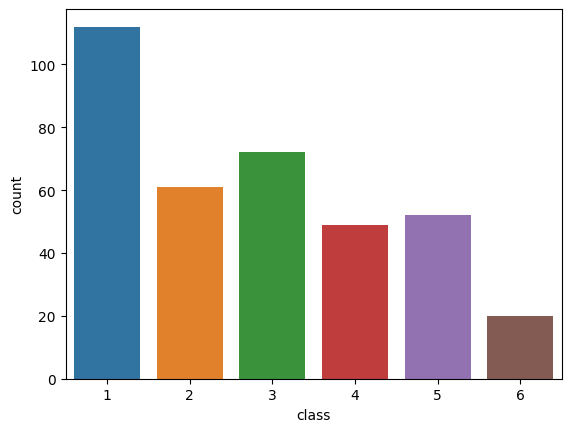

In [8]:
sns.countplot(x=derm_df['class']);

***Conclusion: The target variable is almost fairly distributed***

In [9]:
import plotly.express as px
plt.figure(figsize=(16,8))
fig = px.box(derm_df, x=derm_df['class'], y=derm_df['age'])
fig.show();

<Figure size 1600x800 with 0 Axes>

In [10]:
fig1=px.histogram(derm_df,x=derm_df['vacuolisation_and_damage_of_basal_layer'],
                  color='vacuolisation_and_damage_of_basal_layer',
                  width=800,  height=400);
fig2=px.histogram(derm_df,x=derm_df['elongation_of_the_rete_ridges'],
                  color='elongation_of_the_rete_ridges',width=800,height=400);
fig3=px.histogram(derm_df,x=derm_df['thinning_of_the_suprapapillary_epidermis'],
                  color='thinning_of_the_suprapapillary_epidermis',width=800,height=400);
fig4=px.histogram(derm_df,x=derm_df['spongiform_pustule'],
                  color='spongiform_pustule',width=800,height=400);
fig1.show()
fig2.show()
fig3.show()
fig4.show()

<AxesSubplot: >

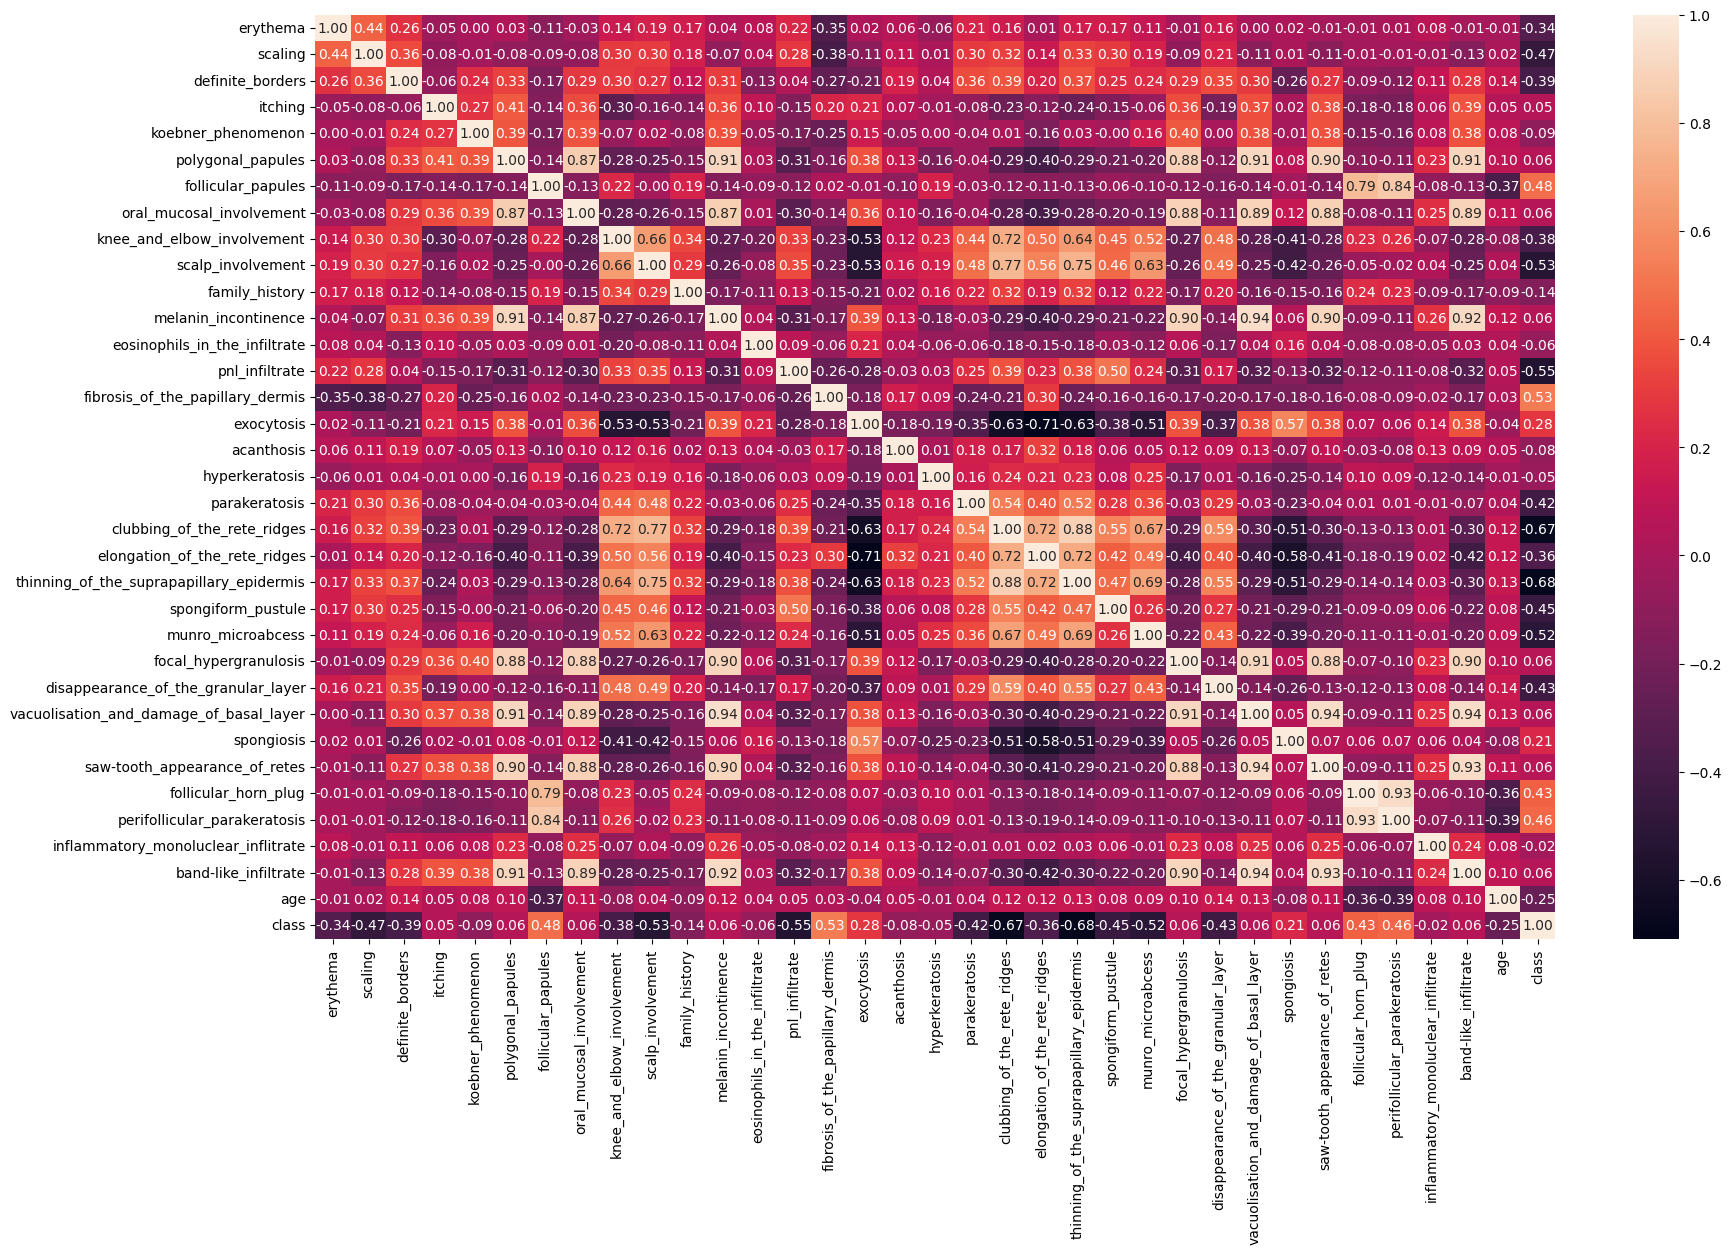

In [11]:
fig=plt.figure(figsize=(20,12))
sns.heatmap(derm_df.corr(),annot=True,fmt='.2f')

### **Data Preprocessing**

**Imputing missing 'age' values**

In [12]:
age=list(derm_df.columns)[33:-1]
age_col=derm_df[age].copy()
!pip install -U scikit-learn
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
imputer.fit(age_col)
age_col=imputer.transform(age_col)
derm_df['age']=age_col


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
derm_df.isna().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [14]:
derm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

**Training & Testing data split**

In [15]:
from sklearn.model_selection import train_test_split
train_df , test_df = train_test_split(derm_df , test_size=0.2 , random_state=42)

**Identifying Input & Target columns**

In [16]:
input_cols = list(train_df.columns)[0:-1]
target_col = 'class'
train_inputs=train_df[input_cols].copy()
train_target=train_df[target_col].copy()
test_inputs=test_df[input_cols].copy()
test_target=test_df[target_col].copy()

In [17]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()

**Feature Scaling using MinMaxScalar**

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(derm_df[numeric_cols])
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

### **Applying Decision Tree Classifier**

In [19]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        # for leaf node
        self.value = value

In [20]:
class Decision_Tree_Classifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth  
        
    def Create_tree(self, dataset, current_depth=0):
        X= dataset[:,:-1]
        Y=dataset[:,-1]
        no_of_samples, no_of_features = np.shape(X)
        
        if no_of_samples>=self.min_samples_split and current_depth<=self.max_depth:
            best_split = self.get_best_split(dataset, no_of_samples, no_of_features)
    
            if best_split["info_gain"]>0:
                left_subtree = self.Create_tree(best_split["dataset_left"], current_depth+1)
                right_subtree = self.Create_tree(best_split["dataset_right"], current_depth+1)
                return Node(best_split["feature_index"], best_split["threshold"],left_subtree, right_subtree, best_split["info_gain"])
        
        leaf_value = self.Compute_leaf_value(Y)
        return Node(value=leaf_value)
    def get_best_split(self, dataset, no_of_samples, no_of_features):
        best_split = {}
        max_info_gain = -float("inf") 
        for feature_index in range(no_of_features):
            feature_values = dataset[: , feature_index]
            possible_thresholds = np.unique(feature_values)
            
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    current_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    if current_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = current_info_gain
                        max_info_gain = current_info_gain
                        
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold]) #contains rows which satisfy the threshold condition, as left part
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold]) #contains those rows which does not satisfy threshold condition, as right part
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def Compute_leaf_value(self, Y):
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def Display_tree(self, tree=None, indent=" "):
        if not tree:
            tree = self.root
        if tree.value is not None:
            print(tree.value)
        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.Display_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.Display_tree(tree.right, indent + indent)
            
    def fit(self, X, Y):
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.Create_tree(dataset)
    
    def predict(self, X):
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [21]:
X = derm_df.iloc[:, :-1].values
Y= derm_df.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y, test_size=.2, random_state=41)

In [22]:
ID3_model=Decision_Tree_Classifier(min_samples_split=4,max_depth=7)
ID3_model.fit(train_X,train_Y)
ID3_model.Display_tree()

X_21 <= 0.0 ? 0.24167326030511982
 left:X_26 <= 0.0 ? 0.2552917348409778
  left:X_14 <= 0.0 ? 0.2603214867661954
    left:X_4 <= 0.0 ? 0.24840753211123584
        left:X_6 <= 1.0 ? 0.23118566308243726
                left:X_25 <= 0.0 ? 0.14329691293791194
                                left:X_8 <= 1.0 ? 0.033775914279058905
                                                                left:X_29 <= 1.0 ? 0.035011090724867897
                                                                                                                                left:2.0
                                                                                                                                right:6.0
                                                                right:1.0
                                right:X_8 <= 0.0 ? 0.46875
                                                                left:4.0
                                                                right:1.0
              

In [23]:
tree_train_pred=ID3_model.predict(train_X)
tree_test_pred=ID3_model.predict(test_X)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print('Training set accuracy : {:.6f}%'.format(accuracy_score(train_Y,tree_train_pred)*100))
print('Testing set accuracy : {:.6f}%'.format(accuracy_score(test_Y,tree_test_pred)*100))
f1_tree_score= f1_score(test_Y, tree_test_pred,average='macro')
print('The F-Score: {:.6f}'.format(f1_tree_score))

Training set accuracy : 98.630137%
Testing set accuracy : 97.297297%
The F-Score: 0.965789


### **Applying K-Nearest Neighbours Classifier**

In [24]:
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier
class K_Nearest_Neighbors_Classifier() : 
    def __init__( self, K ) :
        self.K = K
    def fit( self, X_train, Y_train ) :
        self.X_train = X_train
        self.Y_train = Y_train
        self.m, self.n = X_train.shape
    def predict( self, X_test ) :
        self.X_test = X_test 
        self.m_test, self.n = X_test.shape
        Y_predict = np.zeros( self.m_test)
        for i in range( self.m_test ) :     
            x = self.X_test[i]
            neighbors = np.zeros( self.K )
            neighbors = self.find_neighbors( x )
            Y_predict[i] = mode( neighbors, keepdims=True)[0][0]      
        return Y_predict      
    def find_neighbors( self, x ) :
        euclidean_distances = np.zeros( self.m )
        for i in range( self.m ) : 
            d = self.euclidean( x, self.X_train[i] )
            euclidean_distances[i] = d
        inds = euclidean_distances.argsort()
        Y_train_sorted = self.Y_train[inds]
        return Y_train_sorted[:self.K]
    def euclidean( self, x, x_train ) : 
        return np.sqrt( np.sum( np.square( x - x_train ) ) )

In [25]:
KNN_clf=K_Nearest_Neighbors_Classifier( K = 4)
KNN_clf.fit(train_X,train_Y)
KNN_train_pred=KNN_clf.predict(train_X)
KNN_test_pred=KNN_clf.predict(test_X)
f1_KNN= f1_score(test_Y, KNN_test_pred,average='macro')
print('Training set accuracy : {:.6f}%'.format(accuracy_score(train_Y, KNN_train_pred)*100))
print('Testing set accuracy : {:.6f}%'.format(accuracy_score(test_Y, KNN_test_pred)*100))
print('The F-Score : {:.6f}'.format(f1_KNN))

Training set accuracy : 93.150685%
Testing set accuracy : 91.891892%
The F-Score : 0.895133


### **Conclusion**

In [26]:
acc_scores = [
    ("Decision Tree Classifier" ,accuracy_score(train_Y,tree_train_pred),accuracy_score(test_Y,tree_test_pred), f1_tree_score),
    ("K-Nearest Neighbours" ,accuracy_score(train_Y,KNN_train_pred),accuracy_score(test_Y,KNN_test_pred), f1_KNN)]
acc_scores=pd.DataFrame(data=acc_scores,columns=['Model Name' , 'Train Set Accuracy' , 'Test Set Accuracy' , 'F1 Score'])
acc_scores.set_index('Model Name',inplace=True)
acc_scores

Train Set Accuracy  Test Set Accuracy  F1 Score
Model Name                                                               
Decision Tree Classifier            0.986301           0.972973  0.965789
K-Nearest Neighbours                0.931507           0.918919  0.895133

**Decision Tree & K-Nearest Neighbours classification models have been applied on this dataset. The Decision Tree Classifier had highest test accuracy of 98.6301% and max F-Score of 0.965789.**